In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Elias Image-creator

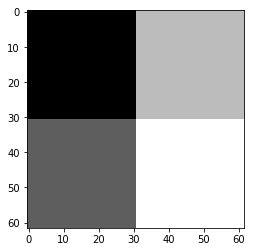

array([  10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,   10.,
         10.,   10.,   10.,   10.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.,
        150.,  150.,  150.,  150.,  150.,  150.,  150.,  150.])

In [2]:
M = 60
N = 60
I = np.zeros((M+2, N+2))
I[:N//2+1, :M//2+1] = 10
I[:N//2+1, -(M//2+1):] = 150
I[-(N//2+1):, :M//2+1] = 80
I[-(N//2+1):, -(M//2+1):] = 200
I = I #+ np.random.rand(N+2,M+2)*20
plt.imshow(I, cmap = "gray")
plt.show()
I[8]

In [3]:
g = lambda s: 1/(1+s)

In [4]:
def f(x, alpha):
    first = 5-np.tanh(alpha*(x-1))-np.tanh(alpha*(x-2))
    second = np.tanh(alpha*(x-4)) + np.tanh(alpha*(x-5)) + 0.1*(np.sin(5*x))**2*np.sin(50*x)
    return first+second

In [5]:
M = 10
N = 5000
x = np.linspace(0, 6, M + 2)
h = 6/(M+1)
k = 0.01 #1/(N+1)
alpha = 30
r = k/(2*h**2)

U = np.zeros((N, M+2)) 
U[0] = f(x, alpha)
#U[0] = I[8] + np.random.normal(size = (N+2,M+2))[8]*20
U[:,0] = U[0,0]
U[:,-1] = U[0, -1]

In [6]:
Dx = (-1 * np.eye(M+2, M+2, k = -1) + np.eye(M+2, M+2, k = 1))/(2*h)
Dx[0,:] = 0
Dx[-1,:] = 0
Dx
Dx.dot(U[0])
# g(Dx.dot(U[0])**2)

array([ 0.        , -1.87073501, -1.83464413, -1.72666139, -1.91201094,
       -0.06006506,  0.07099324,  1.82144712,  1.84884945,  1.87226995,
        1.72483523,  0.        ])

In [7]:
# Forward difference matrix(with backward for last)
Dx = -1 * np.eye(M+2,k = 0) + 1 * np.eye(M+2, k = 1)
Dx[-1, -2:] = [-1, 1]
Dx = Dx/h

In [8]:
A = np.zeros((M, M+2))

for i in range(N-1):
#     if i == 1228:
#         print(U[i])
#         print(Dx)
#         print((Dx.dot(U[i])**2))
#         print((np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G))
#         print((np.eye(M, M+2) + 2 * np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G))
#         print((np.eye(M, M+2) + np.eye(M, M+2, k = 1)).dot(G))
    G = g(Dx.dot(U[i])**2)
    β = (np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    α = (np.eye(M, M+2) + 2 * np.eye(M, M+2, k = 1) + np.eye(M, M+2, k = 2)).dot(G)
    γ = (np.eye(M, M+2) + np.eye(M, M+2, k = 1)).dot(G)
    for j in range(M-1):
        A[j, j:j+3] = [β[j], -α[j], γ[j]]
    U[i+1, 1:-1] = U[i, 1:-1] + r * A.dot(U[i])
#     U[i+1, 0] = U[i+1, 1]
#     U[i+1, -1] = U[i+1, -2]


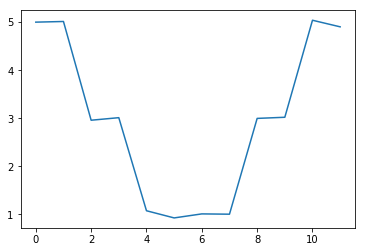

In [9]:
plt.figure()
# plt.plot(x, I[8])
plt.plot(U[0])
plt.show()

In [10]:
plt.figure()
plt.plot(x, U)
# plt.plot(x, I[8])
plt.show()

SyntaxError: invalid syntax (<ipython-input-10-f4693d79c8c3>, line 2)